### 

# <center> Linear Regression and Variations

## References

* Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow - Aurélien Géron
* Machine learning - Fast reference guide - Matt Harrison
* https://www.youtube.com/@patloeber
* https://www.youtube.com/@Dataquestio

___

## Summary

This study presents some topics that help understand linear models, both in terms of estimation and variations. Initially, topics related to linear regression will be addressed, and at at another complementary material, the motivation and flexibilizations that lead to logistic regression, a typical Generalized Linear Model.

Regarding estimation methods, two general methods will be addressed:
* Direct Method
    * Normal equation
    * Pseudo-inverse
* Gradient Descent
    * Normal
    * Batch
    * Stochastic    

Regarding variations of the linear regression model, functional forms and types of regularization will be explored:

* Functional form
    * Linear
    * Polynomial
* Regularizations:
    * Ridge
    * Lasso
    * Elastic Net

## Definition and assumptions

Linear regression is a statistical method that assumes that a particular variable of interest can be explained by a linear combination of input data/features. Estimating the model involves finding the weights or parameters that minimize the prediction errors.

The resulting model will have an equation of the type $ \hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}}x_{1} + \hat{\beta_{2}}x_{2} + ... + \hat{\beta_{n}}x_{n} $ or $ \hat{y} = \beta x  $ in vectorized form.

There are certain assumptions that must be met for inferences to be made, and if these assumptions are satisfied, parameter estimation using the Ordinary Least Squares (OLS) method results in the best unbiased linear estimator.

### Gauss-Markov assumptions:

#### 1 - Random sampling
    We do not want any sampling bias when making predictions, right?

#### 2 - The model is linear in parameters
    The model can take the polynomial form in the variables as long as it is linear in the parameters.

#### 3 - Non-zero variance in X
    There must be variation in the data for the model to be estimated.

#### 4 - No Perfect Collinearity
    Perfect collinearity, depending on the estimation method, implies infinite variance and impossibility of parameter estimation. Even if it is imperfect (correlation <1), but still high, the model will have high variance, generating large confidence intervals for the parameters resulting in low precision of the estimates.

#### 5 - The conditional mean of the residuals is zero (the expected value of the errors is zero)
    This assumption refers to the "other factors" contained in the errors (ui) and that these other factors are uncorrelated with X.

#### 6 - Homoscedasticity (the variance of the residuals is constant)
    The variance of the residual needs to be approximately constant, regardless of the values of X. Assumptions 5 and 6 together imply the normality of the distribution of the residuals.

#### 7 - No correlation between residuals
    The errors of two different observations, conditioned on X, should not be related. Random sampling will avoid autocorrelation.

What is expected is that the residuals do not exhibit a behavior that can be modeled. If they exhibit a defined behavior, there may be bias problems (functional form), absence of relevant explanatory variable for the model, among others.

The fact that the model assumes that errors have a normal distribution with mean zero and constant variance (hypotheses 5 and 6) implies that around the estimated value there is a normal distribution and that the observed value is a realization of that distribution centered on the line. Therefore, the observed value has a probability of being far from the line, i.e., far from the predicted value. However, the probability of being on the line is higher, because being centered on the line, the mean, median, and mode will be on the line.

## More ...

There are two other files that deal with interpreting the models given transformations in the variables and interpreting the model using dummy variables. In addition there is a file with an overview of the linear regression model and the application from sklearn and from scratch on some dataset.

___

## Imports

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

___

## Data

In [2]:
# Create some data
X = 2 * np.random.rand(100, 1)
y = 1 + 3 * X + np.random.rand(100, 1)

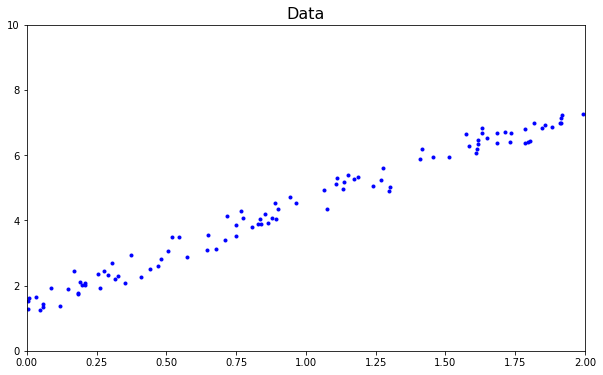

In [3]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'b.')
plt.axis([0,2,0,10])
plt.title('Data', fontsize = 16)
plt.show()

Linear regression models aim to estimate the parameters of a linear equation that minimizes prediction errors. These parameters are found by calculating the weighted sum of input features plus the bias (constant). Once the parameters are estimated, the model can be used to make predictions on new data. To do this, the input features of the new data point are plugged into the equation along with the estimated parameters to obtain the predicted value. This predicted value can then be compared to the true value to evaluate the model's accuracy.

### $ \hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}}x_{1} + \hat{\beta_{2}}x_{2} + ... + \hat{\beta_{n}}x_{n} $

Vectorized form

### $ \hat{y} = h_{\beta}(x) = \beta x  $

___

# <center> Parameter Estimation

Regardless of the method used, the goal is to minimize the prediction errors. Some methods, for mathematical convenience, seek to minimize the square of these errors while others seek optimization iteratively.

In general terms, we model the equation that will result in the error or cost function and calculate the derivative with respect to each parameter by equating the equations to zero. The result will be a system of simultaneous equations that, when solved, will result in a vector containing the parameter or weight of each variable.

### >> Cost function
### $ S_{\beta_{0}, \beta_{1}, \beta_{2}, \beta_{n}} = \sum{(y - \hat{y})}^2 $

### $ S_{\beta_{0}, \beta_{1}, \beta_{2}, \beta_{n}} = \sum{(y - \hat{\beta_{0}} + \hat{\beta_{1}}x_{1} + \hat{\beta_{2}}x_{2} + ... + \hat{\beta_{n}}x_{n})}^2 $

### >> Differentiating the cost function with respect to each parameter 
### $ \frac{\partial S(\beta_{0}, \beta_{1} ... \beta_{n})}{\partial \beta_{0}} = \sum{-2(y_i - \hat{\beta_{0}} + \hat{\beta_{1}}x_{1i} + ... + \hat{\beta_{n}}x_{ni})} = 0 $ 
### $ \frac{\partial S(\beta_{1}, \beta_{1} ... \beta_{n})}{\partial \beta_{1}} = \sum{-2x_1(y_i - \hat{\beta_{0}} + \hat{\beta_{1}}x_{1i} + ... + \hat{\beta_{n}}x_{ni})} = 0 $ 
### $ \frac{\partial S(\beta_{n}, \beta_{1} ... \beta_{n})}{\partial \beta_{n}} = \sum{-2x_n(y_i - \hat{\beta_{0}} + \hat{\beta_{1}}x_{1i} + ... + \hat{\beta_{n}}x_{ni})} = 0 $ 


### >> Estimated equation
### $ \hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}}x_{1} + \hat{\beta_{2}}x_{2} + ... + \hat{\beta_{n}}x_{n} $

Since it is a system of simultaneous equations, the use of linear algebra will facilitate the operations. Next, we will see the implementation from scratch using numpy and the comparison of the result using sklearn.

The examples will be extremely simple using only one predictor variable to allow for visualization of the line fitting.

---

# Direct Method

### $ \hat{\beta}  = (X^{T}X)^{-1} X^{T} y $

### From scratch

In [4]:
# Add constant to matriz X
X_b = np.c_[np.ones((100,1)), X]

# Calculate the vector with the parameters
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# View
beta

array([[1.46029349],
       [3.00763235]])

### From sklearn

In [6]:
# Import
from sklearn.linear_model import LinearRegression

# Create and train model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.46029349]), array([[3.00763235]]))

## SVD Method - Pseudo-Inverse

The direct method shows that at some point it is necessary to calculate the inverse of the matrix resulting from the product of the transpose of the input data matrix by itself. It is known that not all matrices have inverses, in which case a solution cannot be guaranteed for all problems. This does not seem reasonable.

To solve this problem, there is the Moore-Penrose pseudoinverse of X. The SVD (singular value decomposition) method eliminates problems with matrices without inverses, as well as cases with more variables than observations and perfect collinearity.
### $ \hat{\beta}  = X^{+} y $


The idea is to decompose the training matrix $X$ into the product of three matrices.
### $ X^{+} = V \sum^{+}U^{T}  $

To calculate $\sum^{+}$, all values smaller than a small threshold value are set to zero, the remaining values are replaced by their inverse, and the resulting matrix is transposed.

### From numpy

In [8]:
# The LinearRegression class is based on the scipy.linalg.lstsq() class.
beta_svd =  np.linalg.lstsq(X_b, y, rcond = 1e-6)
beta_svd[0]

array([[1.46029349],
       [3.00763235]])

### From scratch (or almost that) 

In [9]:
# Applying the pseudoinverse with numpy
np.linalg.pinv(X_b).dot(y)

array([[1.46029349],
       [3.00763235]])

## Gradient Descent Method

This method minimizes the cost function by iteratively adjusting the parameters.

The most common analogy for gradient descent is to imagine yourself at the top of a mountain and needing to descend as quickly as possible to the bottom of a valley. Moreover, you can't see the slope, you can only feel the slope beneath your feet. The strategy would be to feel the slope on all sides and follow the steepest one.

The algorithm calculates the local gradient of the cost function with respect to the parameter vector and moves in the direction of the gradient descent. When the gradient is zero, we have found the minimum.

**Parameters and Characteristics:**

Learning rate: It is the size of the steps the algorithm takes in search of the minimum. If it is too small, the algorithm needs many iterations to find the minimum. If it is too large, it may overshoot the minimum and end up at a higher point than where it started.

Shape of the cost function: When the function is a convex parabola, starting from the left or right won't make a difference, and the model will walk straight to the unique minimum of the function. If the function has local minima, which would be equivalent to finding holes during the mountain descent, the solution found may not be optimal because we are looking for the global minimum of the function. If the function has a flat slope, we need a large number of iterations to cross the plateau. Increasing the learning rate may be a solution, but if we go too high, as already mentioned, we may overshoot the global minimum and not find a good solution.

The MSE cost function is a convex function without local minima, which means there is only one global minimum. This facilitates parameter estimation, and the result found converges to the results found by previous models.

## Batch GD

The Batch method means that the entire training dataset will be used in each iteration. For very large datasets, the model may become slow, but it will still have better performance than the direct or SVD method.

### $ \triangledown_{\beta}MSE(\beta) = \frac{2}{m} X^{T}(X\beta - y)  $

### $ \beta(next) = \beta - \eta * \triangledown_{\beta}MSE(\beta) $

In [10]:
# Learning rate
eta = 0.1

# Iterations 
n_iterations = 1000
m = 100

# random initialization
beta = np.random.randn(2,1)

for iteration in range (n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(beta) - y)
    beta = beta - eta * gradients
    
# View
beta

array([[1.46029349],
       [3.00763235]])

## Random GD

One of the problems with applying batch GD is that it uses the entire training dataset to calculate gradients at each step, making the training process slower. Stochastic GD works at the other extreme, selecting a random instance from the training set at each step and calculating the gradients based on that single selected instance.

Due to the randomness of the process, this algorithm does not descend smoothly and regularly to the minimum. The cost function will go up and down, only descending on average and ending up very close to the minimum without stabilizing. If the cost function is irregular, containing local minima, stochastic GD has a greater chance of finding the global minimum compared to batch GD.

In summary, stochastic GD is a solution to the problem of local minima, but the model may never stabilize at the minimum. One solution would be to gradually reduce the learning rate. A high rate at the beginning would allow the model to escape local minima, and a low rate at the end would allow the model to stabilize at the global minimum.

### From scratch

In [11]:
# Número de iterações
m = 100

# Número de rodadas
n_epochs = 50

# Hiperparâmetros do cronograma de aprendizado
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

# Inicialização aleatória
beta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        
        gradients = 2 * xi.T.dot(xi.dot(beta) - yi)
        eta = learning_schedule(epoch * m + i)
        beta = beta - eta * gradients
        
# View
beta

array([[1.46989993],
       [2.99947047]])

### From sklearn

In [12]:
# import
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([1.44473258]), array([2.97648539]))

___


# <center> Polinomial Regression

One of the premises of Gauss-Markov is that the model is linear in the parameters. This means that we can use linear regression for data with non-linear behavior without violating this premise, since the non-linearity will be in the data and not in the parameters.

## Quadratic form

In [13]:
# Simple quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) -3
y = -X**2 + X + 2*np.random.randn(m, 1)

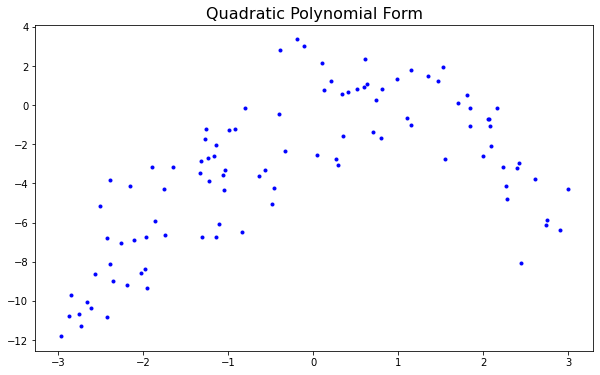

In [14]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'b.')
plt.title('Quadratic Polynomial Form', fontsize = 16)
plt.show()

In [15]:
# add square
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [16]:
# Import
from sklearn.linear_model import LinearRegression

# Create and train model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.36924492]), array([[ 1.10507667, -0.92998084]]))

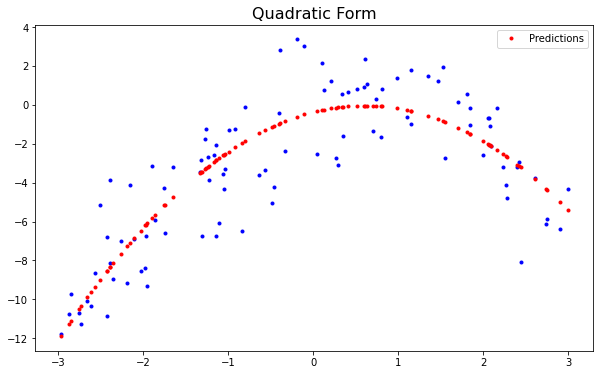

In [17]:
# Predict
predict = lin_reg.predict(X_poly)

# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'b.')
plt.plot(X, predict, 'r.', label = 'Predictions')
plt.title('Quadratic Form', fontsize = 16)
plt.legend()
plt.show()

## Cubic form

In [18]:
# Simple cubic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = X**3 + X**2 + X + 2 + 2* np.random.randn(m, 1)

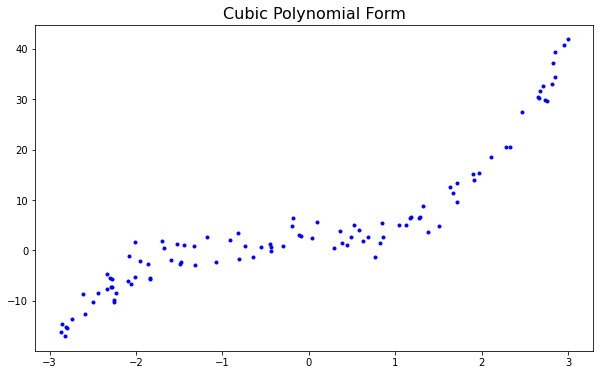

In [19]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'b.')
plt.title('Cubic Polynomial Form', fontsize = 16)
plt.show()

In [20]:
# add cube
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [21]:
# Import
from sklearn.linear_model import LinearRegression

# Create and train model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.71266974]), array([[0.76684959, 1.03259608, 1.02993963]]))

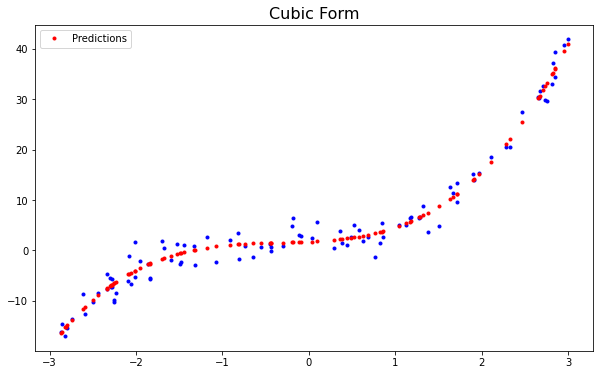

In [22]:
# Predict
predict = lin_reg.predict(X_poly)

# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'b.')
plt.plot(X, predict, 'r.', label = 'Predictions')
plt.title('Cubic Form', fontsize = 16)
plt.legend()
plt.show()

___

## Learning Curves and Trade-off Bias/Variance

The generalization error of a model can be expressed as the sum of three distinct errors:

**Bias:**

    This error is due to wrong assumptions about the model, such as the functional form for example. A high bias can result in an underfitting model.

**Variance:**

    This error is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom, such as a high-degree polynomial model, can have high variance and overfit to the data.

**Irreducible error:**

    These are the noises in the data. To reduce it, we can clean the data and/or improve the source.

Increasing the complexity of a model increases variance and reduces bias, and vice versa.

* High bias: Underfitting model
* High variance: Overfitting model

In [23]:
# Create some data
m = 100
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [24]:
# Imports
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Plot function
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    # PLot
    plt.figure(figsize = (10,6))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val')
    plt.title('Viés/Variância', fontsize = 16)
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

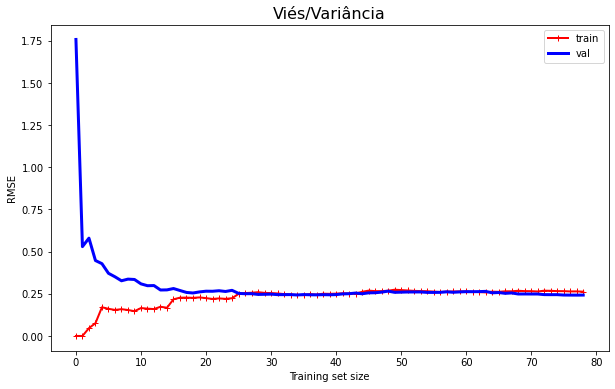

In [25]:
# View
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X, y)

___

# <center> Regularized Models

One way to reduce overfitting is to regularize or restrict the model. In the case of polynomial models, a simple way to restrict the model is to reduce the degree. For linear models, regularization can be achieved by restricting the model weights.

Most regularization models are sensitive to the scale of the data, so it is essential to scale the data before applying any regularized regression model.

# Ridge Regression

Ridge regression adds a regularization term to linear regression. The added parameter is the sum of the squared weights.

### $ J(\beta) = MSE(\beta) + \alpha\frac{1}{2}\sum_{i = 1}^{n}\beta_{i}^{2}   $


### $ \hat{\beta}  = (X^{T}\alpha X)^{-1} X^{T} y $

In [26]:
# Create some data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

# add poly
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [27]:
# Import 
from sklearn.preprocessing import StandardScaler

# Padronizar
X_std = StandardScaler().fit(X).transform(X)
XPoly_std = StandardScaler().fit(X_poly).transform(X_poly)

### Linear model

In [28]:
# import
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# linear
linear_reg = LinearRegression().fit(X_std, y)

# ridge alpha 0
ridge_reg0 = Ridge(alpha = 0, solver = 'cholesky').fit(X_std, y)

# ridge alpha 
ridge_reg01 = Ridge(alpha = 10, solver = 'cholesky').fit(X_std, y)

# ridge alpha 
ridge_reg1 = Ridge(alpha = 20, solver = 'cholesky').fit(X_std, y)

In [29]:
# predict
predict = linear_reg.predict(X_std)
predict0 = ridge_reg0.predict(X_std)
predict01 = ridge_reg01.predict(X_std)
predict1 = ridge_reg1.predict(X_std)

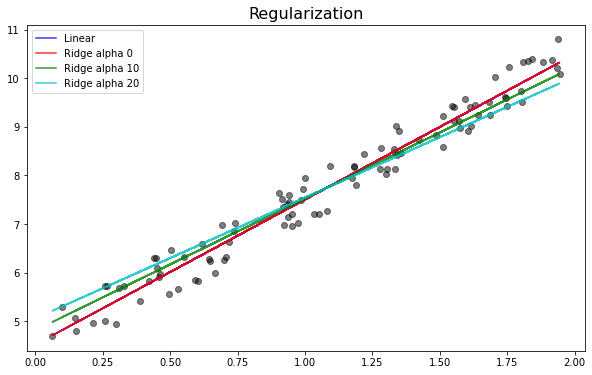

In [30]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'k.', markersize = 12, alpha = 0.5)
plt.plot(X, predict, 'b-', label = 'Linear', alpha = 0.8)
plt.plot(X, predict0, 'r-', label = 'Ridge alpha 0', alpha = 0.8)
plt.plot(X, predict01, 'g-', label = 'Ridge alpha 10', alpha = 0.8)
plt.plot(X, predict1, 'c-', label = 'Ridge alpha 20', alpha = 0.8)
plt.title('Regularization', fontsize = 16)
#plt.axis([0,2,0,15])
plt.legend()
plt.show()

When alpha = 0, regularization disappears and we return to the linear regression model.

### Polinomial model

In [31]:
# Squared equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = X**3 + X**2 + X + 2 + 2* np.random.randn(m, 1)

# add poly
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [32]:
# Import 
from sklearn.preprocessing import StandardScaler

# Scaling
X_std = StandardScaler().fit(X).transform(X)
XPoly_std = StandardScaler().fit(X_poly).transform(X_poly)

In [33]:
# import
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# linear
linear_reg = LinearRegression().fit(XPoly_std, y)

# ridge alpha 
ridge_reg0 = Ridge(alpha = 0, solver = 'cholesky').fit(XPoly_std, y)

# ridge alpha
ridge_reg01 = Ridge(alpha = 100, solver = 'cholesky').fit(XPoly_std, y)

In [34]:
# predict
predict = linear_reg.predict(XPoly_std)
predict0 = ridge_reg0.predict(XPoly_std)
predict01 = ridge_reg01.predict(XPoly_std)

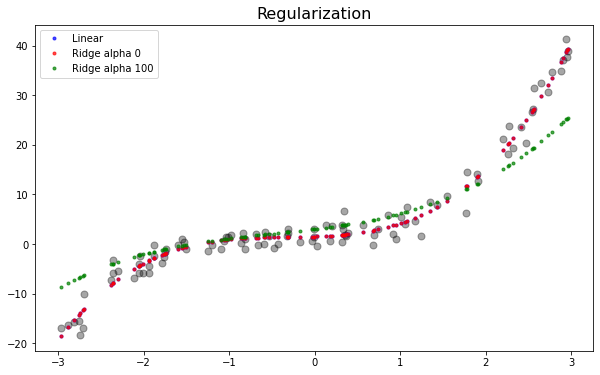

In [35]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'k.', markersize = 14, alpha = 0.35)
plt.plot(X, predict, 'b.', label = 'Linear', alpha = 0.7)
plt.plot(X, predict0, 'r.', label = 'Ridge alpha 0', alpha = 0.7)
plt.plot(X, predict01, 'g.', label = 'Ridge alpha 100', alpha = 0.7)
plt.title('Regularization', fontsize = 16)
#plt.axis([0,2,0,15])
plt.legend()
plt.show()

___

# Lasso Regression

Lasso regression also adds a regularization term to linear regression. The added term is the sum of the absolute values of the weights.

### $ J(\beta) = MSE(\beta) + \alpha\sum_{i = 1}^{n}|\beta_{i}|   $


#### $ \triangledown_{\beta}MSE(\beta) = \frac{2}{m} X^{T}(X\beta - y)  $


### $ g(\beta, J) = \triangledown_{\beta}MSE(\beta) + \alpha \begin{pmatrix} sign(\beta_{1}) \\ sign(\beta_{2}) \\ ... \\ sign(\beta_{n}) \end{pmatrix} $ quando $ sign(\beta_{i}) = \begin{cases} -1 & if \beta_{i} < 0 \\ 0 & if \beta_{i} = 0\\ +1 & if \beta_{i} > 0 \end{cases}$ 

In [36]:
# Create some data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

# add poly
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [37]:
# Import 
from sklearn.preprocessing import StandardScaler

# Scaling
X_std = StandardScaler().fit(X).transform(X)
XPoly_std = StandardScaler().fit(X_poly).transform(X_poly)

### Linear model

In [38]:
# import
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

# linear
linear_reg = LinearRegression().fit(X_std, y)

# ridge alpha 0
lasso_reg0 = Lasso(alpha = 0).fit(X_std, y)

# ridge alpha
lasso_reg01 = Lasso(alpha = 0.5).fit(X_std, y)

# ridge alpha
lasso_reg1 = Lasso(alpha = 0.7).fit(X_std, y)

In [39]:
# predict
predict = linear_reg.predict(X_std)
predict0 = lasso_reg0.predict(X_std)
predict01 = lasso_reg01.predict(X_std)
predict1 = lasso_reg1.predict(X_std)

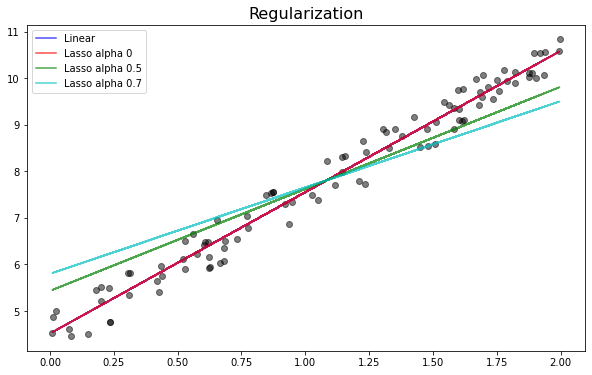

In [40]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'k.', markersize = 12, alpha = 0.5)
plt.plot(X, predict, 'b-', label = 'Linear', alpha = 0.7)
plt.plot(X, predict0, 'r-', label = 'Lasso alpha 0', alpha = 0.7)
plt.plot(X, predict01, 'g-', label = 'Lasso alpha 0.5', alpha = 0.7)
plt.plot(X, predict1, 'c-', label = 'Lasso alpha 0.7', alpha = 0.7)
plt.title('Regularization', fontsize = 16)
#plt.axis([0,2,0,15])
plt.legend()
plt.show()

When alpha = 0, regularization disappears and we return to the linear regression model.

### Polinomial model

In [41]:
# Cubic form
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = X**3 + X**2 + X + 2 + 2* np.random.randn(m, 1)

# add poly
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [42]:
# Import 
from sklearn.preprocessing import StandardScaler

# Scaling
X_std = StandardScaler().fit(X).transform(X)
XPoly_std = StandardScaler().fit(X_poly).transform(X_poly)

In [43]:
# Import
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

# linear
linear_reg = LinearRegression().fit(XPoly_std, y)

# lasso alpha
lasso_reg0 = Lasso(alpha = 1).fit(XPoly_std, y)

# lasso alpha
lasso_reg01 = Lasso(alpha = 2).fit(XPoly_std, y)

In [44]:
# predict
predict = linear_reg.predict(XPoly_std)
predict0 = lasso_reg0.predict(XPoly_std)
predict01 = lasso_reg01.predict(XPoly_std)

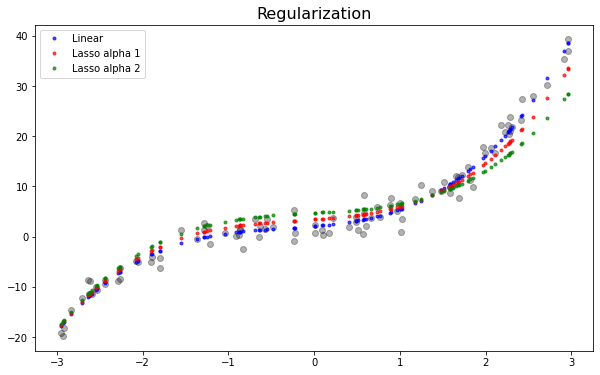

In [45]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'k.', markersize = 12, alpha = 0.3)
plt.plot(X, predict, 'b.', label = 'Linear', alpha = 0.7)
plt.plot(X, predict0, 'r.', label = 'Lasso alpha 1', alpha = 0.7)
plt.plot(X, predict01, 'g.', label = 'Lasso alpha 2', alpha = 0.7)
plt.title('Regularization', fontsize = 16)
#plt.axis([0,2,0,15])
plt.legend()
plt.show()

___

# Elastic Net Regression

The elastic net regression combines ridge and lasso regularizations, allowing the weight of each to be controlled.

$ J(\beta) = MSE(\beta) + r\alpha\sum_{i = 1}^{n}|\beta_{i}| + \frac{1 - r}{2}\alpha\sum_{i = 1}^{n}\beta_{i}^{2}   $

In [46]:
# Create some data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

# add poly
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [47]:
# Import 
from sklearn.preprocessing import StandardScaler

# Padronizar
X_std = StandardScaler().fit(X).transform(X)
XPoly_std = StandardScaler().fit(X_poly).transform(X_poly)

### Linear model

In [48]:
# import
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

# linear
linear_reg = LinearRegression().fit(X_std, y)

# ElasticNet alpha 0
elastic_reg0 = ElasticNet(alpha = 0).fit(X_std, y)

# ElasticNet alpha -1
elastic_reg01 = ElasticNet(alpha = 0.5).fit(X_std, y)

# ElasticNet alpha 1
elastic_reg1 = ElasticNet(alpha = 0.7).fit(X_std, y)

In [49]:
# predict
predict = linear_reg.predict(X_std)
predict0 = elastic_reg0.predict(X_std)
predict01 = elastic_reg01.predict(X_std)
predict1 = elastic_reg1.predict(X_std)

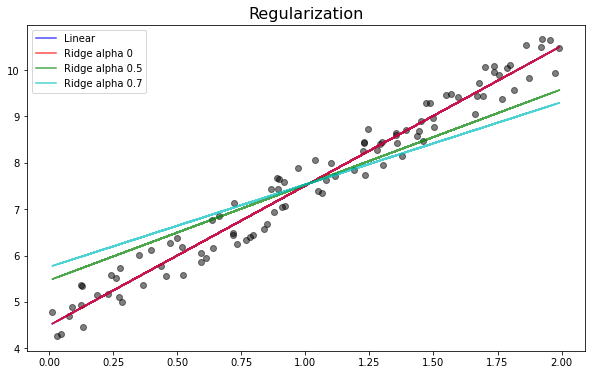

In [50]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'k.', markersize = 12, alpha = 0.5)
plt.plot(X, predict, 'b-', label = 'Linear', alpha = 0.7)
plt.plot(X, predict0, 'r-', label = 'Ridge alpha 0', alpha = 0.7)
plt.plot(X, predict01, 'g-', label = 'Ridge alpha 0.5', alpha = 0.7)
plt.plot(X, predict1, 'c-', label = 'Ridge alpha 0.7', alpha = 0.7)
plt.title('Regularization', fontsize = 16)
#plt.axis([0,2,0,15])
plt.legend()
plt.show()

When alpha = 0, regularization disappears and we return to the linear regression model.

### Polinomial model

In [51]:
# Cubic form
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = X**3 + X**2 + X + 2 + 2* np.random.randn(m, 1)

# add poly
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [52]:
# Import 
from sklearn.preprocessing import StandardScaler

# Scaling
X_std = StandardScaler().fit(X).transform(X)
XPoly_std = StandardScaler().fit(X_poly).transform(X_poly)

In [53]:
# import
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

# linear
linear_reg = LinearRegression().fit(XPoly_std, y)

# ElasticNet alpha 0
elastic_reg0 = ElasticNet(alpha = 0.5).fit(XPoly_std, y)

# ElasticNet alpha -1
elastic_reg01 = ElasticNet(alpha = 1).fit(XPoly_std, y)

In [54]:
# predict
predict = linear_reg.predict(XPoly_std)
predict0 = elastic_reg0.predict(XPoly_std)
predict01 = elastic_reg01.predict(XPoly_std)

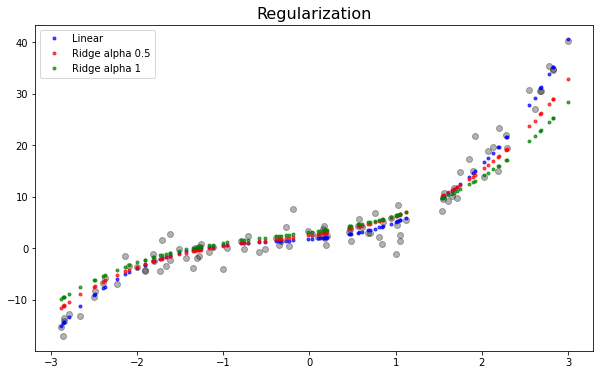

In [55]:
# PLot
plt.figure(figsize = (10,6))

plt.plot(X, y, 'k.', markersize = 12, alpha = 0.3)
plt.plot(X, predict, 'b.', label = 'Linear', alpha = 0.7)
plt.plot(X, predict0, 'r.', label = 'Ridge alpha 0.5', alpha = 0.7)
plt.plot(X, predict01, 'g.', label = 'Ridge alpha 1', alpha = 0.7)
plt.title('Regularization', fontsize = 16)
#plt.axis([0,2,0,15])
plt.legend()
plt.show()

___